In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
test1 = pd.read_csv('../15_modified_data/test_data.csv')
test1.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,date,pickup_community_name,dropoff_community_name,year,month,day,day_of_week,hour,weekend,nonzero_tip
0,2019-01-05 07:00:00,2019-01-05 07:00:00,232.0,1.053800,2.5,0,2.55,False,1,2019-01-05,SOUTH LAWNDALE,SOUTH LAWNDALE,2019,January,5,Saturday,7,1,0
1,2019-08-02 07:15:00,2019-08-02 07:30:00,937.0,9.922978,20.0,0,2.55,False,1,2019-08-02,NEAR WEST SIDE,CHATHAM,2019,August,2,Friday,7,1,0
2,2019-06-11 14:15:00,2019-06-11 14:45:00,1236.0,4.171590,7.5,0,2.55,True,2,2019-06-11,NORTH CENTER,LINCOLN SQUARE,2019,June,11,Tuesday,14,0,0
3,2019-04-22 09:30:00,2019-04-22 10:00:00,1093.0,4.292988,7.5,0,2.55,True,2,2019-04-22,IRVING PARK,BELMONT CRAGIN,2019,April,22,Monday,9,0,0
4,2019-08-15 15:45:00,2019-08-15 16:00:00,1246.0,4.731899,12.5,0,2.55,False,1,2019-08-15,WEST TOWN,LAKE VIEW,2019,August,15,Thursday,15,0,0


In [32]:
len(test1)

23916

In [33]:
test1['nonzero_tip'].isnull().sum()

0

In [58]:
y = test1['nonzero_tip']
X = pd.get_dummies(test1, columns = ['dropoff_community_name', 'pickup_community_name'])
X.drop(['nonzero_tip', 'trip_start_timestamp', 'trip_end_timestamp', 'date' ], axis=1, inplace=True)
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
X['month_int'] = X['month'].map(month_map)
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
X['day_ofweek_int'] = X['day_of_week'].map(day_map)
X['day_ofweek_int'].value_counts()
X.drop(['day_of_week', 'month' ], axis=1, inplace=True)

In [59]:
y.shape

(23916,)

In [61]:
X.shape
# X['nonzero_tip']

(23916, 167)

In [62]:
test = pd.concat([y, X], axis=1)
test.head()

,nonzero_tip,trip_seconds,trip_miles,fare,tip,additional_charges,shared_trip_authorized,trips_pooled,year,day,...,pickup_community_name_WEST ELSDON,pickup_community_name_WEST ENGLEWOOD,pickup_community_name_WEST GARFIELD PARK,pickup_community_name_WEST LAWN,pickup_community_name_WEST PULLMAN,pickup_community_name_WEST RIDGE,pickup_community_name_WEST TOWN,pickup_community_name_WOODLAWN,month_int,day_ofweek_int
0,0,232.0,1.053800,2.5,0,2.55,False,1,2019,5,...,0,0,0,0,0,0,0,0,1,6
1,0,937.0,9.922978,20.0,0,2.55,False,1,2019,2,...,0,0,0,0,0,0,0,0,8,5
2,0,1236.0,4.171590,7.5,0,2.55,True,2,2019,11,...,0,0,0,0,0,0,0,0,6,2
3,0,1093.0,4.292988,7.5,0,2.55,True,2,2019,22,...,0,0,0,0,0,0,0,0,4,1
4,0,1246.0,4.731899,12.5,0,2.55,False,1,2019,15,...,0,0,0,0,0,0,1,0,8,4


In [65]:
# test = pd.concat([X, y], axis=1)
test['nonzero_tip'].value_counts()
test['nonzero_tip'].isnull().sum()

0

In [66]:
tip_count_0, tip_count_1 = test['nonzero_tip'].value_counts()
tip_0 = test[test['nonzero_tip'] == 0]
tip_1 = test[test['nonzero_tip'] == 1]
print('tip 0:', tip_0.shape)
print('tip 1:', tip_1.shape)


tip 0: (19710, 168)
tip 1: (4206, 168)


In [67]:
print('tip 1 %: {:.3f}'.format(tip_count_1 / (tip_count_1 + tip_count_0)))
print('tip 2 %: {:.3f}'.format(tip_count_0 / (tip_count_1 + tip_count_0)))

tip 1 %: 0.176
tip 2 %: 0.824


total class of 1 and 0: 
 0    4206
1    4206
Name: nonzero_tip, dtype: int64
TOTAL rows 8412


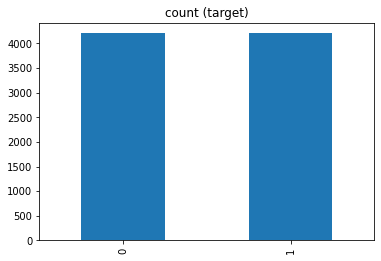

In [68]:
# Undersample
tip_0_under = tip_0.sample(tip_count_1)
test_under = pd.concat([tip_0_under, tip_1], axis=0)
print("total class of 1 and 0: \n", test_under['nonzero_tip'].value_counts())# plot the count after under-sampeling
test_under['nonzero_tip'].value_counts().plot(kind='bar', title='count (target)')
print('TOTAL rows {}'.format(len(test_under)))

In [69]:
test_under['nonzero_tip'].isnull().sum()

0

In [77]:
y = test_under['nonzero_tip']
X = test_under.drop(['nonzero_tip'], axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
log = LogisticRegression()
log.fit(X_train, y_train)
ypred = log.predict(X_test)
ypred

/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, ..., 1, 1, 1])

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [81]:
accuracy_score(ypred, y_test)

1.0

In [82]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       845

    accuracy                           1.00      1683
   macro avg       1.00      1.00      1.00      1683
weighted avg       1.00      1.00      1.00      1683



total class of 1 and 0:
 1    19710
0    19710
Name: nonzero_tip, dtype: int64
TOTAL rows 39420


<AxesSubplot:title={'center':'count (target)'}>

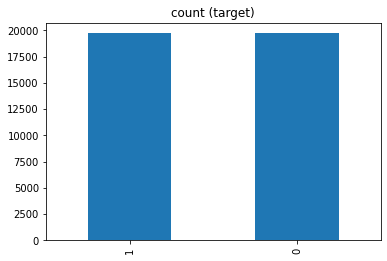

In [84]:
# Oversample
tip_1_over = tip_1.sample(tip_count_0, replace=True)
test_over = pd.concat([tip_1_over, tip_0], axis=0)
print("total class of 1 and 0:\n",test_over['nonzero_tip'].value_counts())# plot the count after under-sampeling
print('TOTAL rows {}'.format(len(test_over)))
test_over['nonzero_tip'].value_counts().plot(kind='bar', title='count (target)')


In [85]:
y = test_over['nonzero_tip']
X = test_over.drop(['nonzero_tip'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
log = LogisticRegression()
log.fit(X_train, y_train)
ypred = log.predict(X_test)
ypred
print('accur', accuracy_score(ypred, y_test))
print(classification_report(y_test, ypred))


accur 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3966
           1       1.00      1.00      1.00      3918

    accuracy                           1.00      7884
   macro avg       1.00      1.00      1.00      7884
weighted avg       1.00      1.00      1.00      7884



/Users/michellevan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import collections
from imblearn.over_sampling import RandomOverSampler


In [20]:
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, y)
print('original dataset shape:', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_rus))

original dataset shape: Counter({0: 19710, 1: 4206})
Resample dataset shape Counter({0: 4206, 1: 4206})


In [21]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_ros))

Original dataset shape Counter({0: 19710, 1: 4206})
Resample dataset shape Counter({0: 19710, 1: 19710})


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_smote))

Original dataset shape Counter({0: 19710, 1: 4206})
Resample dataset shape Counter({0: 19710, 1: 19710})


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)